    Ben Christensen
    October 31, 2018
    Math 437

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la

## Problem 1

In [2]:
#Set initial parameters
u = lambda x: np.sin((x+np.pi)**2-1)
a, b, n = 0, 1, 10
h = (b-a)/n
x = np.linspace(a, b, n+1)
#Approximate first derivative with 1.3
A = np.zeros((n-1, n+1))
np.fill_diagonal(A[:,:-2], -1)
np.fill_diagonal(A[:,2:], 1)
u_prime = 1/(2*h)* A @ np.array([u(i) for i in x])
#Approximate the second derivative with 1.5
B = np.zeros((n-1, n+1))
np.fill_diagonal(B, 1)
np.fill_diagonal(B[:,1:-1], -2)
np.fill_diagonal(B[:,2:], 1)
u_primeprime = 1/(h**2) * B @ np.array([u(i) for i in x])

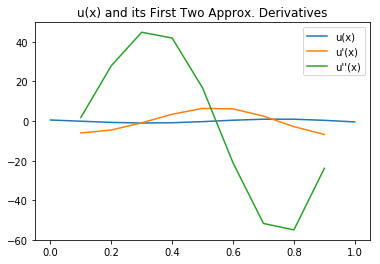

In [3]:
#Graph the results
plt.plot(x, u(x), label="u(x)")
plt.plot(x[1:-1], u_prime, label="u'(x)")
plt.plot(x[1:-1], u_primeprime, label="u''(x)")
plt.title("u(x) and its First Two Approx. Derivatives")
plt.legend()
plt.show()

## Problem 2

In [4]:
def bvp(f, epsilon, alpha, beta, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    #Create left matrix in 1.9
    A = np.zeros((N-1, N-1))
    np.fill_diagonal(A, -2*epsilon)
    np.fill_diagonal(A[1:,:-1], epsilon+h/2)
    np.fill_diagonal(A[:-1,1:],epsilon-h/2)
    #Approximate U using 1.9
    right_vector = np.array([f(x[1])-alpha*(epsilon+h/2)/h**2] + [f(i) for i in x[2:-2]] + [f(x[-2])-beta*(epsilon-h/2)/h**2])
    return np.concatenate(([alpha], la.solve((1/h**2)*A, right_vector), [beta]))


#Set initial parameters
f = lambda x: -1
a, b = 0, 1
epsilon, alpha, beta, N = .1, 1, 3, 100
x = np.linspace(a, b, N+1)
U = bvp(f, epsilon, alpha, beta, N)

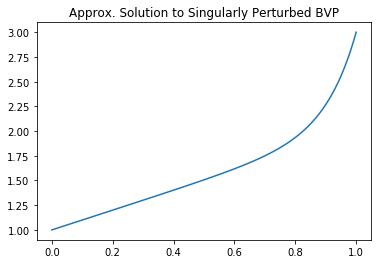

In [5]:
#Graph the results
plt.plot(x, U)
plt.title("Approx. Solution to Singularly Perturbed BVP")
plt.show()

## Problem 3

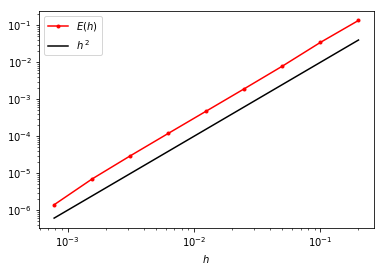

The order of the finite difference approximation is about  2.06975086632 .


In [6]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)
# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
num_sol_best = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[-1])
for j in range(len(N)-1):
    num_sol = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)]))
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print("The order of the finite difference approximation is about ",
    (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])),
    ".")
  
  
  
  
  


The h for 4 digits of accuracy is approximately .007 which corresponds to about 143 intervals. :D

## Problem 4

#Original
def bvp(f, epsilon, a1, a2, a3, alpha, beta, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    #Create left matrix in 1.9
    A = np.zeros((N-1, N-1))
    upper_diag = a1(x[1:-2]) + (h/2)*a2(x[1:-2])
    mid_diag = h**2*a3(x[1:-1]) - 2*a1(x[1:-1])
    lower_diag = a1(x[1:-2]) - (h/2)*a2(x[1:-2])
    A += np.diag(upper_diag, k=1)
    A += np.diag(mid_diag)
    A += np.diag(lower_diag, k=-1)
    #Approximate U using 1.9
    right_vector = np.array([f(x[1])-alpha*(epsilon+h/2)/h**2] + [f(i) for i in x[2:-2]] + [f(x[-2])-beta*(epsilon-h/2)/h**2])
    return np.concatenate(([alpha], la.solve((1/h**2)*A, right_vector), [beta]))


#Set initial parameters
a, b, epsilon, alpha, beta, N = 0, np.pi/2, .1, 0, 1, 100
a1 = lambda x: epsilon*np.ones_like(x)
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)
x = np.linspace(a, b, N+1)
U = bvp(f, epsilon, a1, a2, a3, alpha, beta, N)
#Graph the results
plt.plot(x, U)
plt.title("Approx. Solution to Problem 4")
plt.show()

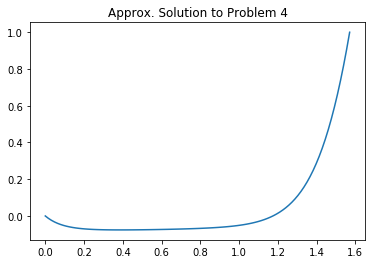

In [7]:
def bvp(f, epsilon, a1, a2, a3, alpha, beta, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    #Create left matrix in 1.9
    A = np.zeros((N-1, N-1))
    upper_diag = a1(x[1:-2]) + (h/2)*a2(x[1:-2])
    mid_diag = h**2*a3(x[1:-1]) - 2*a1(x[1:-1])
    lower_diag = a1(x[2:-1]) - (h/2)*a2(x[2:-1])
    A += np.diag(upper_diag, k=1)
    A += np.diag(mid_diag)
    A += np.diag(lower_diag, k=-1)
    #Approximate U using 1.9
    right_vector = np.array([f(x[1])-alpha*(a1(x[1]) - (h/2)*a2(x[1]))/h**2] + [f(i) for i in x[2:-2]] + [f(x[-2])-beta*(a1(x[-2]) + (h/2)*a2(x[-2]))/h**2])
    return np.concatenate(([alpha], la.solve((1/h**2)*A, right_vector), [beta]))


#Set initial parameters
a, b, epsilon, alpha, beta, N = 0, np.pi/2, .1, 0, 1, 100
a1 = lambda x: epsilon*np.ones_like(x)
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)
x = np.linspace(a, b, N+1)
U = bvp(f, epsilon, a1, a2, a3, alpha, beta, N)
#Graph the results
plt.plot(x, U)
plt.title("Approx. Solution to Problem 4")
plt.show()

## Problem 5

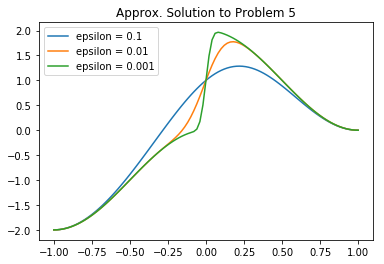

In [8]:
#Set initial parameters
a, b, epsilon, alpha, beta, N = -1, 1, [.1, .01, .001], -2, 0, 100
x = np.linspace(a, b, N+1)
a2 = lambda x: x
a3 = lambda x: np.zeros_like(x)
for e in epsilon:
    a1 = lambda x: e*np.ones_like(x)
    f = lambda x: -e*np.pi**2*np.cos(x*np.pi) - x*np.pi*np.sin(x*np.pi)
    U = bvp(f, e, a1, a2, a3, alpha, beta, N)
    #Graph the results
    plt.plot(x, U, label='epsilon = ' + str(e))
    plt.title("Approx. Solution to Problem 5")
plt.legend()
plt.show()

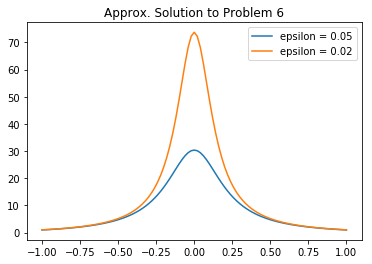

In [9]:
#Set initial parameters
a, b, epsilon, N = -1, 1, [.05, .02], 100
x = np.linspace(a, b, N+1)
a2 = lambda x: 4*x
a3 = lambda x: 2*np.ones_like(x)
for e in epsilon:
    alpha, beta = 1/(1+e), 1/(1+e)
    a1 = lambda x: e*np.ones_like(x) + x**2
    f = lambda x: -e*np.pi**2*np.cos(x*np.pi) - x*np.pi*np.sin(x*np.pi)
    U = bvp(f, e, a1, a2, a3, alpha, beta, N)
    #Graph the results
    plt.plot(x, U, label='epsilon = ' + str(e))
    plt.title("Approx. Solution to Problem 6")
plt.legend()
plt.show()